# Quantum Fourier Transform

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
qml.drawer.use_style(style='sketch')

In [3]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def qft2(states):
    qml.BasisEmbedding(states, wires=range(2))
    qml.QFT(wires=range(2))
    return qml.state()

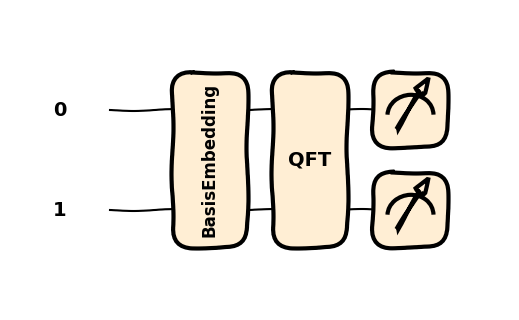

In [4]:
x = np.array([1,0])
qml.draw_mpl(qft2)(x)
plt.show()

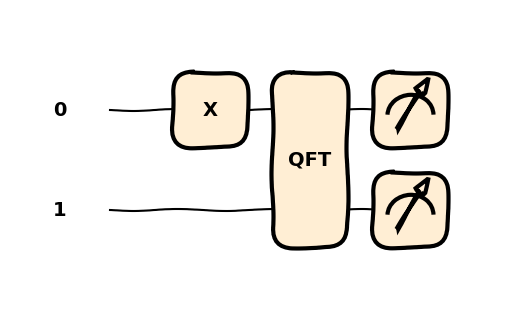

In [5]:
qml.draw_mpl(qft2, expansion_strategy='device')(x)
plt.show()

In [6]:
qft2(x)

tensor([ 0.5+0.0000000e+00j, -0.5+6.1232340e-17j,  0.5-1.2246468e-16j,
        -0.5+1.8369702e-16j], requires_grad=True)

$$
|\phi\rangle = |10\rangle \Rightarrow a_2 = 1 \\
\psi_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} a_j e^{2\pi i j k / N} = \frac{1}{2} e^{i k \pi}
$$

- $\psi_0 = \frac{1}{2} e^{0} = \frac{1}{2}$

- $\psi_1 = \frac{1}{2} e^{i \pi} = -\frac{1}{2}$

- $\psi_2 = \frac{1}{2} e^{2i \pi} = \frac{1}{2}$

- $\psi_3 = \frac{1}{2} e^{3i \pi} = -\frac{1}{2}$

In [7]:
def gen_qft(n):
    dev = qml.device('default.qubit', wires=n)
    @qml.qnode(dev)
    def circuit(states):
        qml.BasisEmbedding(states, wires=range(n))
        qml.QFT(wires=range(n))
        return qml.state()
    
    return dev, circuit

def gen_qft_scratch(n):
    dev = qml.device('default.qubit', wires=n)
    @qml.qnode(dev)
    def circuit(states):
        qml.BasisEmbedding(states, wires=range(n))
        for i in range(n):
            qml.Hadamard(wires=i)
            for j in range(i+1, n):
                angle = 2 * np.pi / 2**(j+1)
                qml.CPhase(angle, wires=(j,i))
        for i in range(n//2):
            qml.SWAP(wires=(i,n-i-1))
        return qml.state()
    
    return dev, circuit

**Caution** : Pennylane uses MSB (Most Significant Bit) convention, so the qubit order is reversed compared to the Qiskit convention.

In [8]:
dev, circuit = gen_qft_scratch(2)

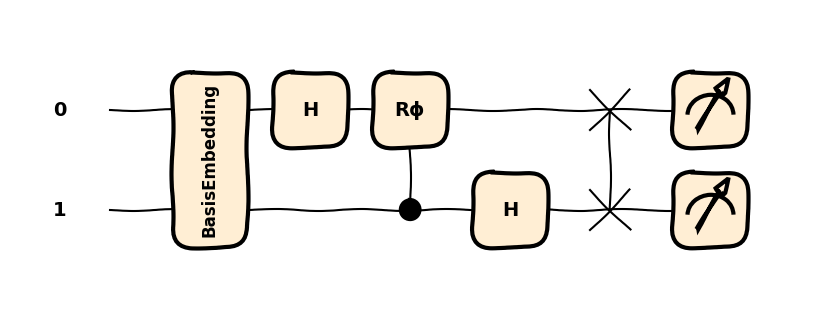

In [9]:
qml.draw_mpl(circuit)(x)
plt.show()

In [10]:
circuit(x)

tensor([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j], requires_grad=True)

In [11]:
dev1, circuit = gen_qft(4)
dev2, circuit_scratch = gen_qft_scratch(4)

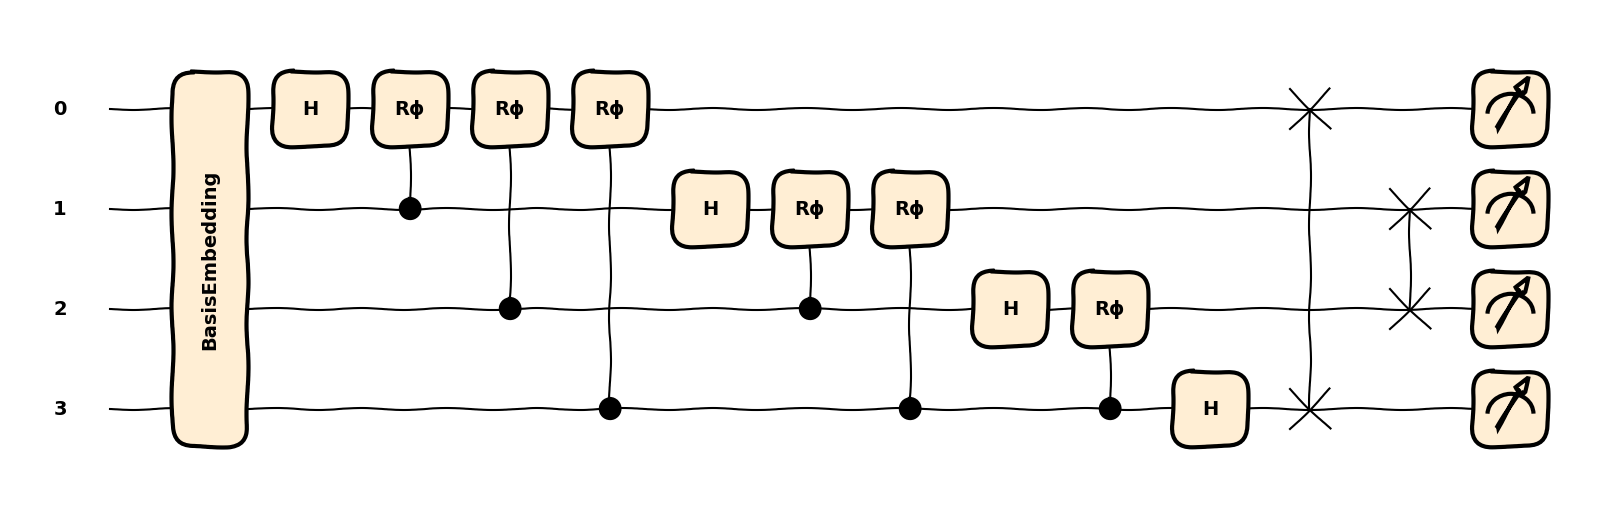

In [12]:
x = np.array([0, 1, 0, 1])
qml.draw_mpl(circuit_scratch)(x)
plt.show()

In [13]:
circuit(x)

tensor([ 2.50000000e-01+0.00000000e+00j, -9.56708581e-02+2.30969883e-01j,
        -1.76776695e-01-1.76776695e-01j,  2.30969883e-01-9.56708581e-02j,
        -2.77555756e-16+2.50000000e-01j, -2.30969883e-01-9.56708581e-02j,
         1.76776695e-01-1.76776695e-01j,  9.56708581e-02+2.30969883e-01j,
        -2.50000000e-01-5.55111512e-16j,  9.56708581e-02-2.30969883e-01j,
         1.76776695e-01+1.76776695e-01j, -2.30969883e-01+9.56708581e-02j,
         8.32667268e-16-2.50000000e-01j,  2.30969883e-01+9.56708581e-02j,
        -1.76776695e-01+1.76776695e-01j, -9.56708581e-02-2.30969883e-01j], requires_grad=True)

In [14]:
circuit_scratch(x)

tensor([ 0.25      +0.j        , -0.09567086+0.23096988j,
        -0.23096988-0.09567086j,  0.1767767 -0.1767767j ,
         0.23096988+0.09567086j, -0.1767767 +0.1767767j ,
        -0.1767767 -0.1767767j ,  0.23096988-0.09567086j,
        -0.25      +0.j        ,  0.09567086-0.23096988j,
         0.23096988+0.09567086j, -0.1767767 +0.1767767j ,
        -0.23096988-0.09567086j,  0.1767767 -0.1767767j ,
         0.1767767 +0.1767767j , -0.23096988+0.09567086j], requires_grad=True)